In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')

In [4]:
train.shape

(101763, 23)

In [5]:
test.shape

(67842, 22)

In [6]:
train.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [37]:
y = train.defects
X = train.drop('defects', axis=1)
X_test = test

<AxesSubplot:xlabel='defects', ylabel='count'>

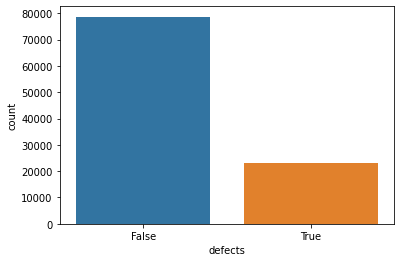

In [39]:
sns.countplot(x=y)

In [33]:
y= y.map({True: 1, False:0})

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

2023-10-03 15:15:11.443034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model = Sequential()

model.add(Dense(22, activation='relu', input_shape=[22],kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
model.add(BatchNormalization(synchronized=True))
model.add(Dropout(0.2))
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(11,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=0)

In [16]:
model.fit(X_train_scaled, y_train,
         verbose=1,
         batch_size=32,
         epochs=100,
         validation_data=[X_val_scaled, y_val],
         callbacks=[early_stop]
         )

Epoch 1/100
2545/2545 [==============================] - 6s 2ms/step - loss: 1.2857 - accuracy: 0.6488 - val_loss: 0.8351 - val_accuracy: 0.7989
Epoch 2/100
2545/2545 [==============================] - 4s 2ms/step - loss: 0.6987 - accuracy: 0.7910 - val_loss: 0.5702 - val_accuracy: 0.8017
Epoch 3/100
2545/2545 [==============================] - 4s 2ms/step - loss: 0.5431 - accuracy: 0.8009 - val_loss: 0.4867 - val_accuracy: 0.8100
Epoch 4/100
2545/2545 [==============================] - 4s 2ms/step - loss: 0.4890 - accuracy: 0.8056 - val_loss: 0.4576 - val_accuracy: 0.8131
Epoch 5/100
2545/2545 [==============================] - 4s 2ms/step - loss: 0.4710 - accuracy: 0.8073 - val_loss: 0.4500 - val_accuracy: 0.8132
Epoch 6/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.4643 - accuracy: 0.8098 - val_loss: 0.4428 - val_accuracy: 0.8132
Epoch 7/100
2545/2545 [==============================] - 11s 4ms/step - loss: 0.4585 - accuracy: 0.8099 - val_loss: 0.4412 - val_a

<AxesSubplot:>

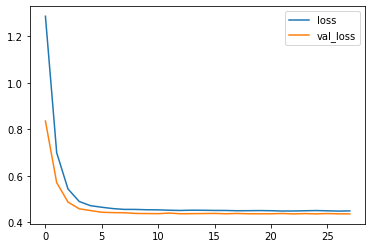

In [17]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [18]:
prob_pred = model.predict(X_val_scaled)

637/637 [==============================] - 1s 838us/step


In [19]:
predictions = (model.predict(X_val_scaled) > 0.5).astype('int32')

637/637 [==============================] - 1s 925us/step


In [20]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay

fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=predictions)

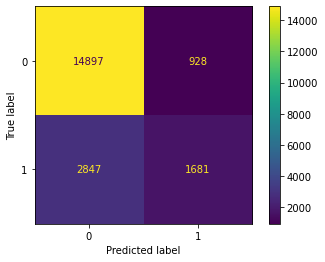

In [21]:
matrix =confusion_matrix(y_pred=predictions, y_true=y_val)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()

In [22]:
print(classification_report(y_true=y_val, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15825
           1       0.64      0.37      0.47      4528

    accuracy                           0.81     20353
   macro avg       0.74      0.66      0.68     20353
weighted avg       0.80      0.81      0.79     20353



In [23]:
fpr

array([0.        , 0.05864139, 1.        ])

In [24]:
tpr

array([0.        , 0.37124558, 1.        ])

In [25]:
thresholds

array([inf,  1.,  0.])

In [26]:
prob_pred = model.predict(X_test_scaled)

  42/2121 [..............................] - ETA: 2s 

2121/2121 [==============================] - 2s 1ms/step


In [27]:
submission = pd.DataFrame(index=test.id, data=prob_pred, columns=['defects'])

In [28]:
submission.to_csv('submission.csv')